# Banknote authentication

For Downloading Dataset (https://github.com/shubh2002/DataSets)

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score


import warnings 
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('banknote_authentication.csv',names=['variance','skewness','curtosis','entropy','class'])

In [7]:
df.shape

(1372, 5)

In [8]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

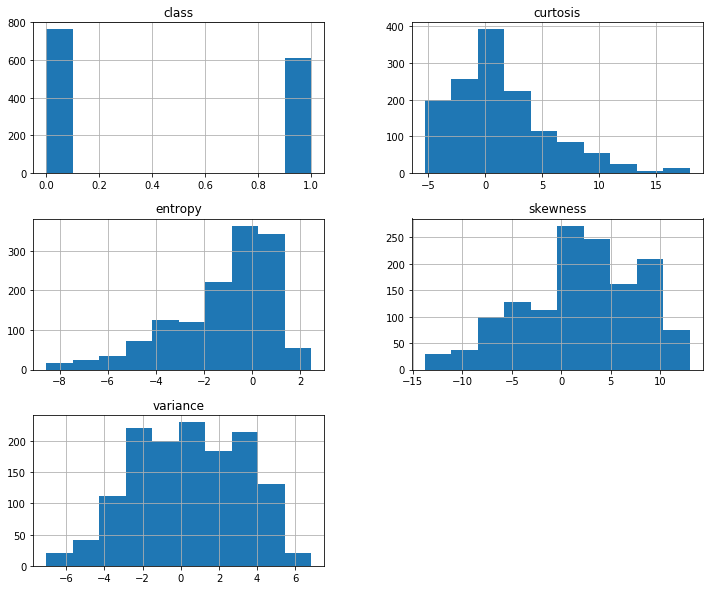

In [12]:
df.hist(figsize=(12,10))
plt.show()

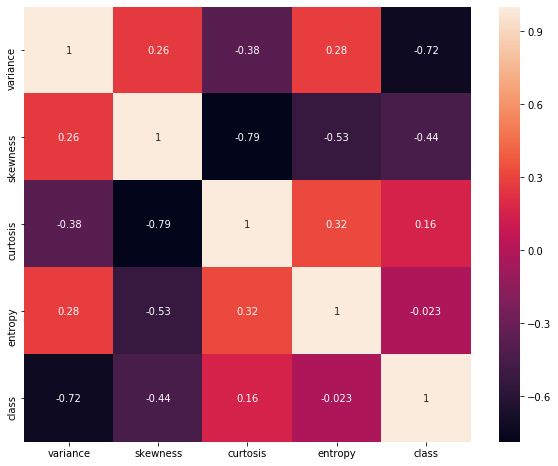

In [13]:
corr_heatmap=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_heatmap,annot=True)

In [16]:
x=df.iloc[:,df.columns!='class']
x.shape

(1372, 4)

In [17]:
y=df.iloc[:,df.columns=='class']
y.shape

(1372, 1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_scaled=scaling.fit_transform(x)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
pre1=precision_score(y_test,y_pred)
rec1=recall_score(y_test,y_pred)
acc1

0.9795918367346939

In [24]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
pre2=precision_score(y_test,y_pred)
rec2=recall_score(y_test,y_pred)
acc2

0.8279883381924198

In [26]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy')
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
pre3=precision_score(y_test,y_pred)
rec2=recall_score(y_test,y_pred)
acc3

0.9883381924198251

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
y_pred=model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
pre4=precision_score(y_test,y_pred)
rec2=recall_score(y_test,y_pred)
acc4

1.0

In [30]:
from sklearn.svm import SVC
model5=SVC()
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred)
pre5=precision_score(y_test,y_pred)
rec5=recall_score(y_test,y_pred)
acc5

1.0